# Loading Dependencies

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample

# Loading data

In [84]:
data = pd.read_csv('jojo-stands.csv', encoding='latin1')

In [85]:
data.head()

,Stand,PWR,SPD,RNG,PER,PRC,DEV
0,Anubis,B,B,E,A,E,C
1,Atum,D,C,D,B,D,D
2,Bastet,E,E,B,A,E,E
3,Cream,B,B,D,C,C,D
4,Death Thirteen,C,C,E,B,D,B


In [86]:
data.tail()

,Stand,PWR,SPD,RNG,PER,PRC,DEV
151,Nightbird Flying,E,A,A,A,E,E
152,Purple Haze Distortion,A,B,E,E,C,A
153,Rainy Day Dream Away,E,B,A,A,E,E
154,Remote Romance,E,D,Infi,B,C,E
155,House of Holy,E,B,C,A,D,D


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Stand   156 non-null    object
 1   PWR     139 non-null    object
 2   SPD     150 non-null    object
 3   RNG     147 non-null    object
 4   PER     155 non-null    object
 5   PRC     149 non-null    object
 6   DEV     147 non-null    object
dtypes: object(7)
memory usage: 8.7+ KB


In [88]:
data.describe()

,Stand,PWR,SPD,RNG,PER,PRC,DEV
count,156,139,150,147,155,149,147
unique,154,6,6,6,6,6,6
top,Echoes (ACT3),E,B,A,A,E,E
freq,2,34,41,38,85,56,41


# Handling null stats by craeting new class

In [89]:
# Removing null values
data[['PWR','SPD','RNG','PER','PRC','DEV']] = data.drop('Stand', axis=1).fillna('F')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Stand   156 non-null    object
 1   PWR     156 non-null    object
 2   SPD     156 non-null    object
 3   RNG     156 non-null    object
 4   PER     156 non-null    object
 5   PRC     156 non-null    object
 6   DEV     156 non-null    object
dtypes: object(7)
memory usage: 8.7+ KB


# Encoding data (str -> int) for model creation

In [90]:
# Encoding data

# Encode map
grid_map = {'F': 0, 'E': 2, 'D': 4, 'C': 6, 'B': 8, 'A': 10, 'Infi': 20}

# Data encoding
data[['PWR','SPD','RNG','PER','PRC','DEV']] = data.drop('Stand', axis=1).replace(grid_map)
data.to_csv('./encoded-jojo-stands.csv', encoding='latin1', index=False)

C:\Users\manpr\AppData\Local\Temp\ipykernel_28880\1158455228.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[['PWR','SPD','RNG','PER','PRC','DEV']] = data.drop('Stand', axis=1).replace(grid_map)


# Converting to Labeled data for supervised learning

In [91]:
df = pd.read_csv('labeled-encoded-jojo-stands.csv', encoding='latin1')

data['Rank'] = df['Rank']

In [92]:
data.describe()

,PWR,SPD,RNG,PER,PRC,DEV,Rank
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.551282,6.435897,6.512821,8.564103,4.576923,5.410256,1.102564
std,3.624816,3.492258,3.766554,2.568241,3.005454,3.499072,1.119790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,4.000000,8.000000,2.000000,2.000000,0.000000
50%,6.000000,6.000000,6.000000,10.000000,4.000000,6.000000,1.000000
75%,8.000000,8.000000,10.000000,10.000000,6.000000,8.000000,2.000000
max,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,3.000000


In [93]:
print('Max: ',data[data['Rank'] == data['Rank'].max()])
print('Min: ' , data[data['Rank'] == data['Rank'].min()])

Max:                        Stand  PWR  SPD  RNG  PER  PRC  DEV  Rank
1                      Atum    4    6    4    8    4    4     3
9                     Khnum    2    2    2   10    2    2     3
10                   Osiris    2    4    4    6    4    4     3
11                   Sethan    4    4    2    6    4    4     3
12               Tenore Sax    2    2    4   10    2    2     3
13                    Tohth    2    2    2   10    2    2     3
19            Hermit Purple    4    6    4   10    4    2     3
26                 Strength    8    4    4   10    2    2     3
31         Wheel of Fortune    8    4    4   10    2    4     3
32        Yellow Temperance    4    6    2   10    2    4     3
33             Achtung Baby    2    2    0   10    2   10     3
35        Atom Heart Father    2    2    0   10    2    2     3
38              Cheap Trick    2    2    2   10    2    2     3
53                Super Fly    2    2    0   10    2    2     3
61                Stray Cat    8  

# Checking for data imbalance

In [94]:
# imbalanced
data['Rank'].value_counts().reset_index()

,Rank,count
0,0,60
1,1,50
2,3,30
3,2,16


In [95]:
# Sep majority and minority classes
dfs = [data[data['Rank'] == i] for i in sorted(data['Rank'].unique())]

# Max count among all classes
max_count = max(len(df) for df in dfs)

# Upsample all classes to have max_count samples
upsampled = [resample(df, replace=True, n_samples=max_count, random_state=42) for df in dfs]

# balanced data
balanced_data = pd.concat(upsampled)

# Exploratory Data Analysis

In [96]:
# Defining plots

def classDist(data):
  # Get count of each class
  x = data['Rank'].value_counts().reset_index()

  plt.figure(figsize=(6,3))
  plt.bar(x=x['Rank'],height=x['count'], color='Green')
  plt.title('Class Distribution')
  plt.show()

  plt.figure(figsize=(6,5))
  plt.pie(x=x['count'], labels=x['Rank'], autopct='%1.1f%%')
  plt.title('Class distribution')
  plt.show()

def statDist(data):
  data[['PWR', 'SPD', 'RNG', 'PER', 'PRC', 'DEV']].hist(figsize=(10,5), bins=15)
  plt.suptitle("Distribution of Stats")
  plt.tight_layout()
  plt.show()

def boxPlot(data):
  data[['PWR', 'SPD', 'RNG', 'PER', 'PRC', 'DEV']].plot(kind='box', figsize=(10, 6))
  plt.title("Boxplot of All Stats")
  plt.show()

## Before Balancing

Class Distribution: 


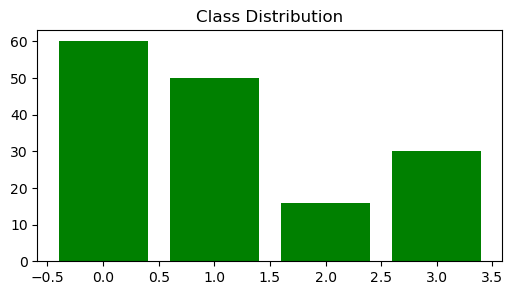

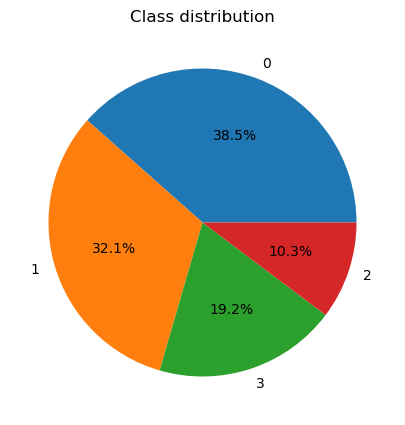

Stat Distribution: 


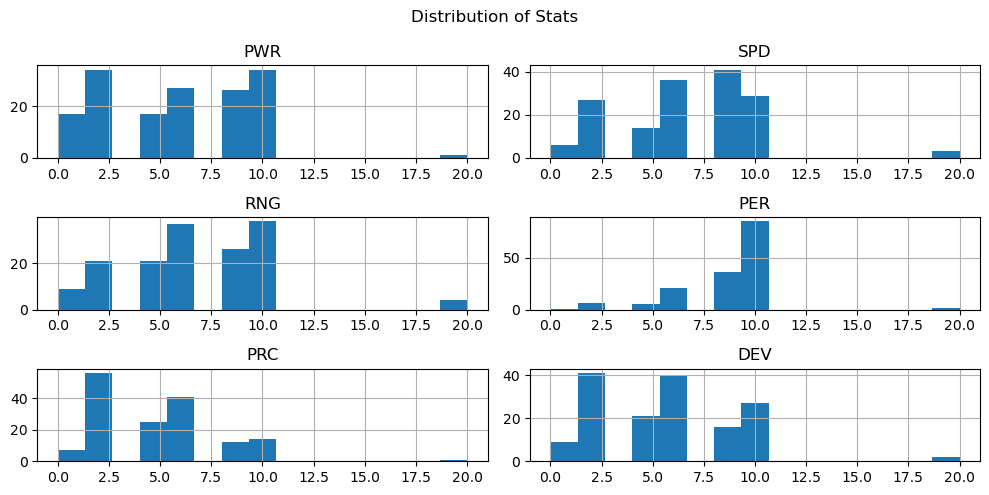

Boxplot: 


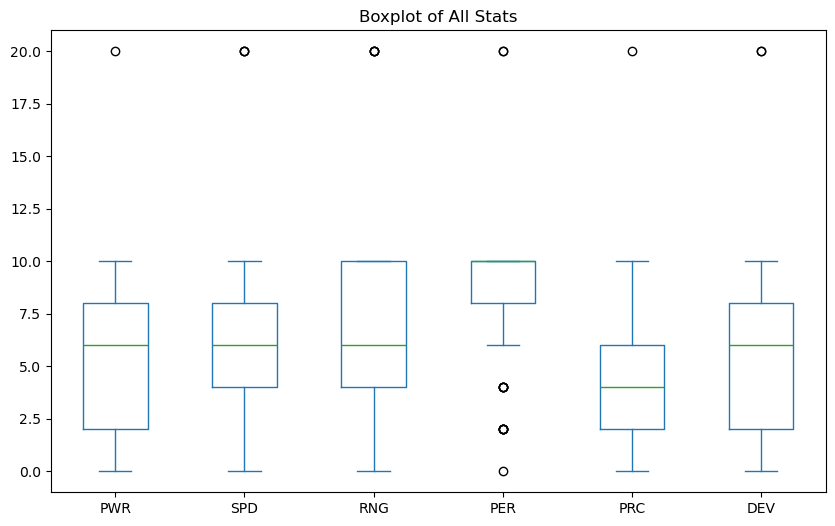

In [97]:
# Display class distribution
print('Class Distribution: ')
classDist(data)

# Display Stat Distribution
print('Stat Distribution: ')
statDist(data)

#Display boxplot for outliers
print('Boxplot: ')
boxPlot(data)

## After Balancing

In [98]:
# Balance Data
data = balanced_data

Class Distribution: 


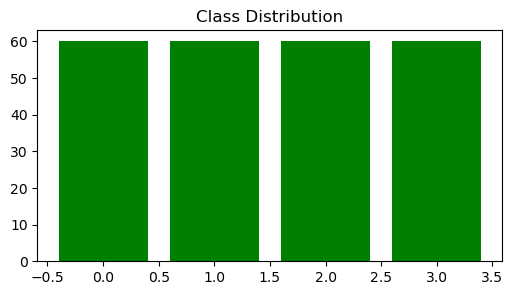

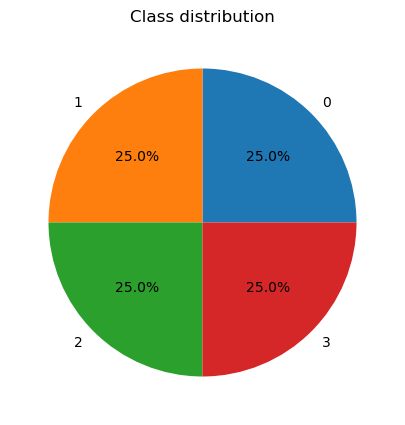

Stat Distribution: 


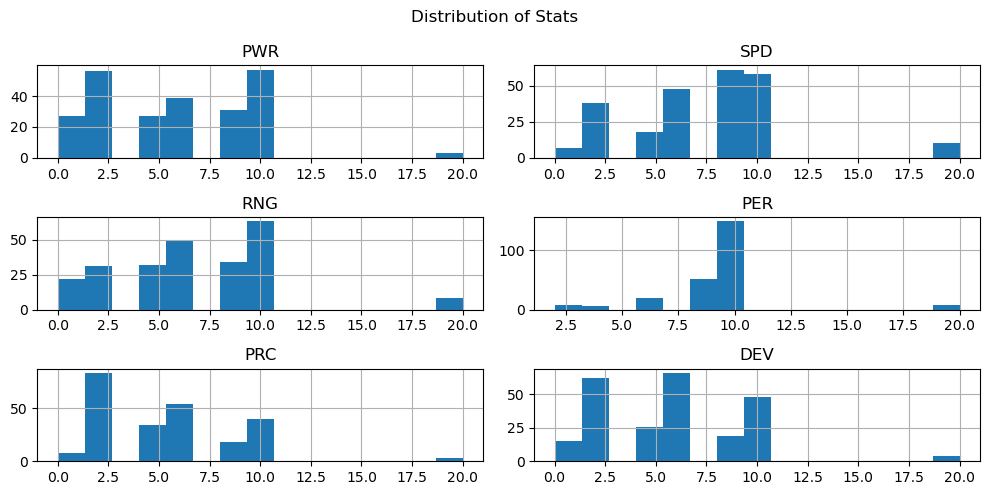

Boxplot: 


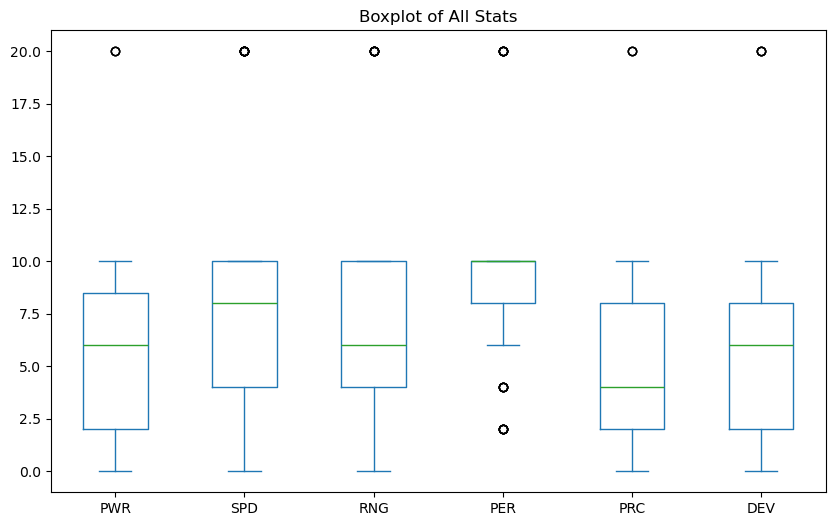

In [99]:
# Display class distribution
print('Class Distribution: ')
classDist(data)

# Display Stat Distribution
print('Stat Distribution: ')
statDist(data)

#Display boxplot for outliers
print('Boxplot: ')
boxPlot(data)

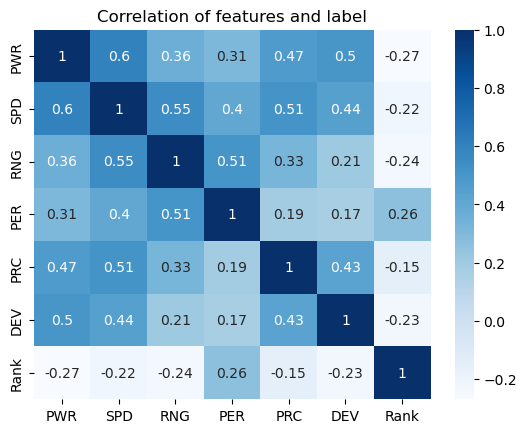

In [100]:
sns.heatmap(data.drop('Stand', axis=1).corr(), cmap='Blues', annot=True)
plt.title('Correlation of features and label')
plt.show()

# Model creation

In [101]:
x = data.drop(['Stand','Rank'], axis=1)
y = data['Rank']

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [103]:
model = LogisticRegression(max_iter=1000)

In [104]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

# Performance evaluation

In [105]:
y_pred = model.predict(x_test)

# Confusion Matrix

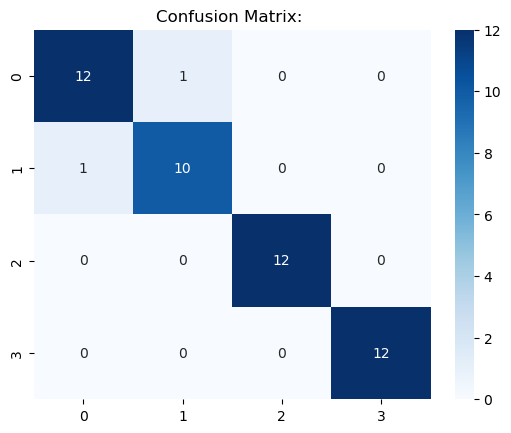

In [106]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='Blues',annot=True)
plt.title('Confusion Matrix: ')
plt.show()

# Classification Report

In [107]:
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.91      0.91      0.91        11
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



# Unlabeled data prediction

In [116]:
encoded_map = { 'F':0, 'E':2 , 'D':4, 'C':6, 'B':8, 'A':10, 'Infi':20  }
encoded_class = { 1: 'Average', 3: 'Weak', 0:'Strong', 2:'God' }

def detect_and_display(pwr,spd,rng,per,prc,dev):
  encoded_pwr = encoded_map[pwr]
  encoded_spd = encoded_map[spd]
  encoded_rng = encoded_map[rng]
  encoded_per = encoded_map[per]
  encoded_prc = encoded_map[prc]
  encoded_dev = encoded_map[dev]

  stats = np.array([[encoded_pwr,encoded_spd,encoded_rng,encoded_per,encoded_prc,encoded_dev]])

  prediction = model.predict(stats)

  print(f'Prediction: {prediction}, Rank: {encoded_class[prediction[0]]}')


In [117]:
pwr = input('PWR: ').capitalize()
spd = input('SPD: ').capitalize()
rng = input('RNG: ').capitalize()
per = input('PER: ').capitalize()
prc = input('PRC: ').capitalize()
dev = input('DEV: ').capitalize()

detect_and_display(pwr,spd,rng,per,prc,dev)

Prediction: [0], Rank: Strong


c:\Users\manpr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
